# Linear Regression from Scratch on Salary-Experience Dataset

In [1]:
import numpy as np


## Model From Scratch

In [2]:
class Linear_Regression():
    #initiating the parameters
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations
    #x=experiance y=salary
    def fit(self,x,y):
        self.m,self.n=x.shape
        self.w=np.zeros(self.n)
        self.b=0
        self.x=x
        self.y=y

        #implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        y_prediction=self.predict(self.x)

        dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
        db=-2*np.sum(self.y-y_prediction)/self.m

        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db
        
    def predict(self,x):
        
        return x.dot(self.w)+self.b

In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
salary_data=pd.read_csv("salary_data.csv")

In [6]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.shape

(30, 2)

In [8]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
x=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,1].values

In [10]:
 x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [13]:
x_train

array([[ 2.9],
       [ 9.6],
       [ 4. ],
       [ 2.2],
       [ 3.9],
       [ 5.1],
       [10.3],
       [ 9. ],
       [ 5.3],
       [ 1.5],
       [ 3.2],
       [ 9.5],
       [ 8.7],
       [ 5.9],
       [ 4. ],
       [ 7.9],
       [10.5],
       [ 4.1],
       [ 4.9],
       [ 3.2]])

In [14]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [15]:
model.fit(x_train,y_train)

In [16]:
print(model.w[0])
print(model.b)

9514.400999035135
23697.406507136307


# y=9514.400999035135(x)+23697.406507136307
# salary=9514.400999035135(experience)+23697.406507136307

In [17]:
test_data_prediction=model.predict(x_test)

In [18]:
test_data_prediction

array([ 36066.12780588,  34163.24760607,  66512.21100279,  58900.69020357,
        91249.65360029,  80783.81250135, 101715.49469922,  52240.60950424,
        42726.20850521,  88395.33330058])

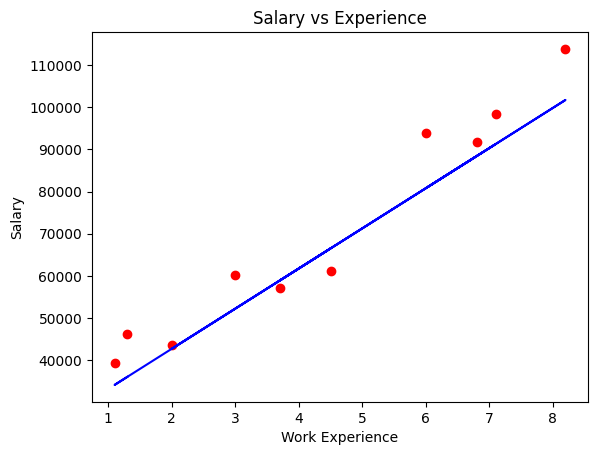

In [19]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_prediction,color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()